In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [281]:
data = pd.read_excel("manipulator_data.xlsx")
test = pd.read_excel("test_data.xlsx")

In [282]:
data

,Company ID,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI,Manipulater,C-MANIPULATOR
0,1,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082,Yes,1
1,2,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732,Yes,1
2,3,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305,Yes,1
3,4,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975,Yes,1
4,5,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...
1234,1235,0.893794,1.009273,1.121404,0.775386,1.035547,1.467146,-0.139215,0.947127,No,0
1235,1236,1.610841,1.000000,0.672489,3.320315,0.743969,0.968648,-0.028570,2.052802,No,0
1236,1237,0.711823,0.938368,1.045118,1.057345,1.274005,0.634451,-0.174759,0.782268,No,0
1237,1238,0.870641,1.035855,1.447722,1.202783,1.101233,1.010935,-0.061474,0.906750,No,0


In [283]:
data.drop(labels=["Manipulater","Company ID"],axis=1,inplace=True)

#### Importing required libraries

In [284]:
data

,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI,C-MANIPULATOR
0,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082,1
1,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732,1
2,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305,1
3,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975,1
4,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047,1
...,...,...,...,...,...,...,...,...,...
1234,0.893794,1.009273,1.121404,0.775386,1.035547,1.467146,-0.139215,0.947127,0
1235,1.610841,1.000000,0.672489,3.320315,0.743969,0.968648,-0.028570,2.052802,0
1236,0.711823,0.938368,1.045118,1.057345,1.274005,0.634451,-0.174759,0.782268,0
1237,0.870641,1.035855,1.447722,1.202783,1.101233,1.010935,-0.061474,0.906750,0


In [285]:
#Since the data is imbalanced, Up sampling will solve the problem
from sklearn.model_selection import train_test_split
from sklearn.utils import resample


In [286]:
# Separate majority and minority classes
majorty = data[data["C-MANIPULATOR"]==0]
minorty = data[data["C-MANIPULATOR"]==1]
 
# Upsample minority class
minorty_upsampled = resample(minorty, 
                                 replace=True,     # sample with replacement
                                 n_samples=1200,    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([majorty, minorty_upsampled])
 

In [287]:
# Display new class counts
data_upsampled["C-MANIPULATOR"].value_counts()
# 1    576
# 0    576
# Name: balance, dtype: int64

1    1200
0    1200
Name: C-MANIPULATOR, dtype: int64

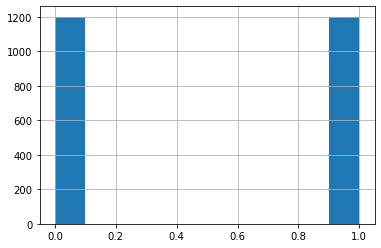

In [288]:
data_upsampled["C-MANIPULATOR"].hist()
plt.show()

In [289]:
data_upsampled.tail(10)

,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI,C-MANIPULATOR
38,1.000000,0.910133,0.977251,1.578685,1.062822,0.979850,0.156851,0.744895,1
34,1.000000,1.000000,1.086281,4.527020,0.531541,2.240098,0.087842,8.563866,1
2,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305,1
36,1.427451,1.005147,0.465712,1.569888,0.906374,0.849488,0.197597,0.842004,1
29,36.291185,-0.515328,1.014408,0.027685,1.142857,11.794286,-0.020011,1.027593,1
37,3.753597,3.101434,1.163566,0.847958,1.002885,0.276007,-0.592258,1.070585,1
33,1.000000,1.000000,0.408386,1.000000,1.000000,1.000000,0.387133,0.358269,1
11,1.448389,0.795671,4.001688,1.067377,1.085547,3.734491,0.090458,0.222090,1
18,0.615328,0.859324,0.899378,1.716066,0.942606,1.566082,0.132832,0.138589,1
36,1.427451,1.005147,0.465712,1.569888,0.906374,0.849488,0.197597,0.842004,1


In [290]:
x_train,x_test,y_train,y_test = train_test_split(data_upsampled.drop(labels=["C-MANIPULATOR"],axis=1),
                                                 data_upsampled["C-MANIPULATOR"],test_size=0.25,random_state=42)

In [291]:
print("Length of Train Predictors {} and Target {}".format(len(x_train),len(y_train)))
print("Length of Test Predictors {} and Target {}".format(len(x_test),len(y_test)))

Length of Train Predictors 1800 and Target 1800
Length of Test Predictors 600 and Target 600


In [82]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

#x_train_scaled = scaler.fit_transform(x_train)
#x_test_scaled = scaler.fit_transform(x_test)

In [ ]:
#for x in pd.DataFrame(x_train_scaled).columns:
    #print("Plotting index VS {}".format(data.columns[x]))
    #plotscatter(range(0,len(x_train_scaled)),pd.DataFrame(x_train_scaled).iloc[:,x])

## 1. Decision Tree
- Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. 

In [292]:
from sklearn.model_selection import GridSearchCV

In [293]:
from sklearn.tree import DecisionTreeClassifier

In [294]:
hyperparameter_1 = {"max_depth":[5,6,7],
                   "criterion":["gini","entropy"],
                   "max_features":["auto", "sqrt", "log2"]}

In [295]:
Desclf = DecisionTreeClassifier()

In [297]:
clf01 = GridSearchCV(Desclf,hyperparameter_1,cv=10)

In [298]:
clf01.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [299]:
print("Best Parameters: {}".format(clf01.best_params_),
     "\nBest Score: {}".format(round(clf01.best_score_,4)*100),"%")

Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto'} 
Best Score: 93.78 %


### Checking confusion matrix and scores

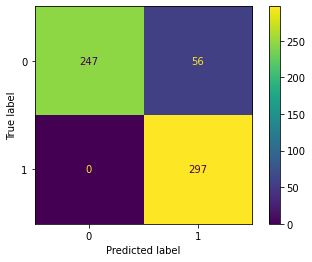

In [300]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf01,x_test,y_test)
plt.grid(False)
plt.show()

### 2. Random forest

In [301]:
from sklearn.ensemble import RandomForestClassifier

In [302]:
forest=RandomForestClassifier()

In [303]:
hyperparam_2={"n_estimators":[50,100,150,200],
            'max_features' : ['log2','sqrt'],
            'max_depth': [5,6,8,9,10,12]}


In [304]:
clf02=GridSearchCV(forest,hyperparam_2,cv=10)

In [305]:
clf02.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 6, 8, 9, 10, 12],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [50, 100, 150, 200]})

In [306]:
print("Best Parameters: {}".format(clf02.best_params_),
     "\nBest Score: {}".format(round(clf02.best_score_,4)*100),"%")

Best Parameters: {'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 150} 
Best Score: 99.83 %


### 3. Adaboost
- AdaBoost (Adaptive Boosting) is a machine learning meta-algorithm developed by Yoav Freund and Robert Schapire, who were awarded the Gödel Prize in 2003 for their work. It can be combined with a variety of other learning algorithms to boost results.

In [307]:
from sklearn.ensemble import AdaBoostClassifier

In [308]:
clf_ada = AdaBoostClassifier(random_state=42)

In [309]:
hyperparameter_3 = {"n_estimators":[400,500,600,700,800],
                   "algorithm":["SAMME","SAMME.R"]}

In [310]:
clf03 = GridSearchCV(clf_ada,hyperparameter_3,cv=10)

In [311]:
clf03.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': [400, 500, 600, 700, 800]})

In [312]:
print("Best Parameters: {}".format(clf03.best_params_),
     "\nBest Score: {}".format(round(clf03.best_score_,4)*100),"%")

Best Parameters: {'algorithm': 'SAMME.R', 'n_estimators': 500} 
Best Score: 99.56 %


### 4. SVC

In [313]:
from sklearn.svm import SVC
#from sklearn.model_selection import RandomizedSearchCV

In [314]:
clf_svc = SVC(random_state=42)

In [315]:
hyperparameters_4 = {"kernel":["rbf","poly","sigmoid","linear"],
                    "degree":[3,4,8]}

In [316]:
clf04 = GridSearchCV(clf_svc,hyperparameters_4,cv=10,n_jobs=-1)

In [317]:
clf04.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'degree': [3, 4, 8],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [318]:
print(clf04.best_estimator_,
     clf04.best_score_)

SVC(kernel='linear', random_state=42) 0.8727777777777778


## Neural Network using MLP.

In [319]:
import tensorflow as tf
import keras as ks

In [320]:
from sklearn.neural_network import MLPClassifier
dnn_clf = MLPClassifier()

In [321]:
hyperparameter_5 = {"hidden_layer_sizes":[[100]*2,[100]*3,[100]*5],
                   "max_iter":[500]}

In [322]:
clf05 = GridSearchCV(dnn_clf,hyperparameter_5,cv=30)

In [323]:
clf05.fit(x_train,y_train)

GridSearchCV(cv=30, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [[100, 100], [100, 100, 100],
                                                [100, 100, 100, 100, 100]],
                         'max_iter': [500]})

In [324]:
print(clf05.best_estimator_,clf05.best_score_)

MLPClassifier(hidden_layer_sizes=[100, 100], max_iter=500) 0.986111111111111


### Evaluation of model with metrics F1Score, AUC_score and Accuracy

##### Evaluating different models on the basis of different metrics like F1 Score, ROC score.
- clf01 : Decision Tree
- clf02 : Random Forest
- clf03 : AdaBoost
- clf04 : SVC
- clf05 : MLPClassifier

In [325]:
x_test

,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI
10,1.000000,0.863156,1.009767,1.395014,1.001872,0.987882,-0.004574,1.006394
17,1.778241,0.742246,-2.130100,1.937308,1.000000,1.806630,0.146384,1.079540
894,0.951871,0.980090,1.356334,1.131217,0.945576,1.026637,-0.145159,1.039188
4,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047
14,1.252242,1.006480,1.174924,1.250304,0.953411,1.111494,-0.013454,1.118081
...,...,...,...,...,...,...,...,...
21,1.000000,0.872010,0.652510,13.064653,1.103716,0.096956,0.041028,1.176655
637,0.460117,1.367296,0.875473,1.606944,0.670820,1.395350,-0.188752,1.000565
32,1.009934,1.095584,5.702904,0.902743,1.237174,0.624588,0.007920,2.556236
15,8.347615,0.495240,0.573016,0.672111,0.941860,1.487849,0.060811,13.058559


In [326]:
y_test

10     1
17     1
894    0
4      1
14     1
      ..
21     1
637    0
32     1
15     1
302    0
Name: C-MANIPULATOR, Length: 600, dtype: int64

In [327]:
from sklearn.metrics import f1_score,roc_auc_score,roc_curve,accuracy_score

In [328]:
y_pred = clf01.predict(x_test)
print("F1 score for clf01 {}".format(f1_score(y_test,y_pred)),
     "\nAccuracy score for clf01 {}".format(accuracy_score(y_test,y_pred)),
     "\nroc_auc_score for clf01 {}".format(roc_auc_score(y_test,y_pred)))



F1 score for clf01 0.9138461538461539 
Accuracy score for clf01 0.9066666666666666 
roc_auc_score for clf01 0.9075907590759076


In [329]:
y_pred = clf02.predict(x_test)
print("F1 score for clf02 {}".format(f1_score(y_test,y_pred)),
     "\nAccuracy score for clf02 {}".format(accuracy_score(y_test,y_pred)),
     "\nroc_auc_score for clf02 {}".format(roc_auc_score(y_test,y_pred)))



F1 score for clf02 1.0 
Accuracy score for clf02 1.0 
roc_auc_score for clf02 1.0


In [330]:
y_pred = clf03.predict(x_test)
print("F1 score for clf03 {}".format(f1_score(y_test,y_pred)),
     "\nAccuracy score for clf03 {}".format(accuracy_score(y_test,y_pred)),
     "\nroc_auc_score for clf03 {}".format(roc_auc_score(y_test,y_pred)))


F1 score for clf03 0.9933110367892978 
Accuracy score for clf03 0.9933333333333333 
roc_auc_score for clf03 0.9933993399339933


In [331]:
y_pred = clf04.predict(x_test)
print("F1 score for clf04 {}".format(f1_score(y_test,y_pred)),
     "\nAccuracy score for clf04 {}".format(accuracy_score(y_test,y_pred)),
     "\nroc_auc_score for clf04 {}".format(roc_auc_score(y_test,y_pred)))


F1 score for clf04 0.8605042016806723 
Accuracy score for clf04 0.8616666666666667 
roc_auc_score for clf04 0.8616695002833616


In [332]:
y_pred = clf05.predict(x_test)
print("F1 score for clf05 {}".format(f1_score(y_test,y_pred)),
     "\nAccuracy score for clf05 {}".format(accuracy_score(y_test,y_pred)),
     "\nroc_auc_score for clf05 {}".format(roc_auc_score(y_test,y_pred)))


F1 score for clf05 0.9834437086092715 
Accuracy score for clf05 0.9833333333333333 
roc_auc_score for clf05 0.9834983498349835


##### Evaluate on untouched data

In [333]:
from sklearn.metrics import plot_roc_curve

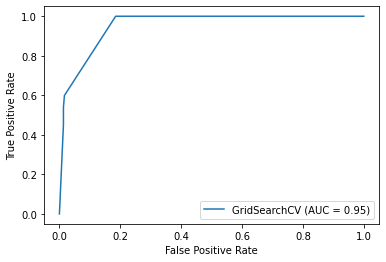

In [334]:
plot_roc_curve(clf01,x_test,y_test)

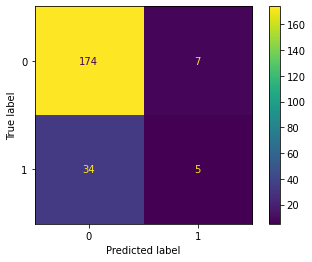

In [335]:
plot_confusion_matrix(clf01,X_scaled,Y)
plt.grid(False)
plt.show()

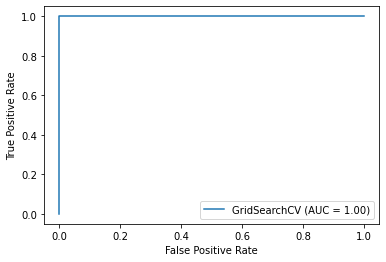

In [336]:
plot_roc_curve(clf02,x_test,y_test)

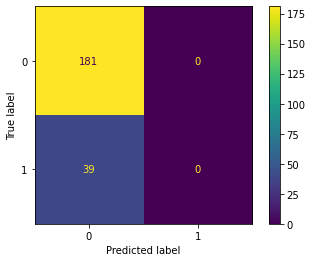

In [337]:
plot_confusion_matrix(clf02,X_scaled,Y)
plt.grid(False)
plt.show()

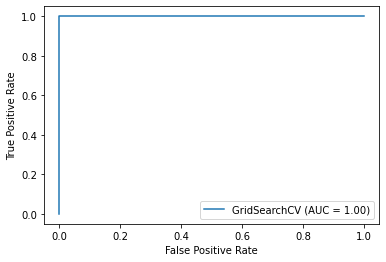

In [338]:
plot_roc_curve(clf03,x_test,y_test)

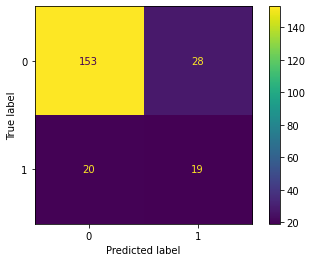

In [339]:
plot_confusion_matrix(clf03,X_scaled,Y)
plt.grid(False)
plt.show()

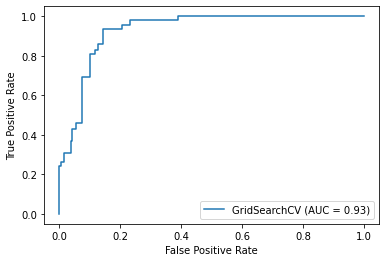

In [340]:
plot_roc_curve(clf04,x_test,y_test)

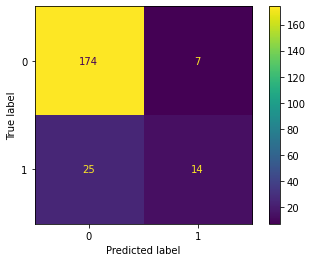

In [341]:
plot_confusion_matrix(clf04,X_scaled,Y)
plt.grid(False)
plt.show()

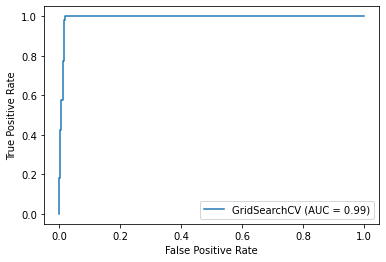

In [342]:
plot_roc_curve(clf05,x_test,y_test)

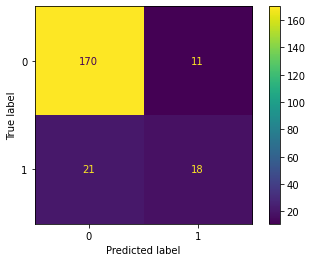

In [343]:
plot_confusion_matrix(clf05,X_scaled,Y)
plt.grid(False)
plt.show()

##### Out of all 5 models only two models  generalised best. Rest were overfitted.

In [344]:
test

,Company ID,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI,Manipulator,C-MANIPULATOR
0,1,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082,Yes,1
1,2,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732,Yes,1
2,3,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305,Yes,1
3,4,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975,Yes,1
4,5,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...
215,216,1.002026,0.998118,-0.917605,1.088962,1.030527,1.076770,-0.001079,1.080009,No,0
216,217,0.909365,1.170298,1.971874,1.279013,0.971605,0.985939,-0.035854,1.025102,No,0
217,218,0.937403,0.973292,1.131131,1.083577,1.050011,0.959512,-0.095279,0.976332,No,0
218,219,1.044944,1.021424,4.437887,0.870790,1.026489,1.060493,-0.157146,0.916070,No,0


In [345]:
test.drop(labels=["Manipulator","Company ID"],axis=1,inplace=True)

In [346]:
test

,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI,C-MANIPULATOR
0,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082,1
1,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732,1
2,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305,1
3,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975,1
4,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047,1
...,...,...,...,...,...,...,...,...,...
215,1.002026,0.998118,-0.917605,1.088962,1.030527,1.076770,-0.001079,1.080009,0
216,0.909365,1.170298,1.971874,1.279013,0.971605,0.985939,-0.035854,1.025102,0
217,0.937403,0.973292,1.131131,1.083577,1.050011,0.959512,-0.095279,0.976332,0
218,1.044944,1.021424,4.437887,0.870790,1.026489,1.060493,-0.157146,0.916070,0


In [347]:
X = test.drop(labels=["C-MANIPULATOR"],axis=1)
Y = test["C-MANIPULATOR"]

In [348]:
X

,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI
0,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082
1,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732
2,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305
3,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975
4,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047
...,...,...,...,...,...,...,...,...
215,1.002026,0.998118,-0.917605,1.088962,1.030527,1.076770,-0.001079,1.080009
216,0.909365,1.170298,1.971874,1.279013,0.971605,0.985939,-0.035854,1.025102
217,0.937403,0.973292,1.131131,1.083577,1.050011,0.959512,-0.095279,0.976332
218,1.044944,1.021424,4.437887,0.870790,1.026489,1.060493,-0.157146,0.916070


In [349]:
X_scaled = scaler.fit_transform(X)

In [350]:
X_scaled

array([[ 0.03594639,  0.00751741,  1.49736601, ...,  0.06243316,
        -1.16613437,  0.05163808],
       [-0.18541126,  0.14610903, -0.0895797 , ...,  1.12122753,
         0.60178325, -0.1199098 ],
       [-0.18541126, -0.02536868, -0.02887542, ..., -0.22684134,
         0.41709525,  0.15320289],
       ...,
       [-0.20759067, -0.03764849, -0.05718818, ..., -0.13446019,
        -0.60974314, -0.13014333],
       [-0.16948672, -0.02368035,  0.79193603, ..., -0.10454544,
        -1.09097569, -0.18943717],
       [-0.20005741, -0.05398916, -0.09094994, ..., -0.14393226,
        -0.99841847, -0.17046535]])

### Final result on Deciscion Tree

In [351]:
predicts = clf01.predict(X_scaled)

print(accuracy_score(Y,predicts))

print(f1_score(Y,predicts))

0.8136363636363636
0.196078431372549


### Final result on Randomforest

In [352]:
predicts = clf02.predict(X_scaled)

print(accuracy_score(Y,predicts))

print(f1_score(Y,predicts))

0.8227272727272728
0.0


### Final result on Adaboost

In [353]:
predicts = clf03.predict(X_scaled)

print(accuracy_score(Y,predicts))

print(f1_score(Y,predicts))

0.7818181818181819
0.4418604651162791


### Final result on SVC

In [354]:
predicts = clf04.predict(X_scaled)

In [355]:
accuracy_score(Y,predicts)

0.8545454545454545

In [356]:
f1_score(Y,predicts)

0.4666666666666667

### Final result on MLPClassifier

In [357]:
predicts = clf05.predict(X_scaled)

print(accuracy_score(Y,predicts))

print(f1_score(Y,predicts))

0.8545454545454545
0.5294117647058824
